In [1]:
pip install qiskit --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 7.7 MB/s eta 0:00:00


In [2]:
pip install qiskit-aer --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 71.6 MB/s eta 0:00:00


In [3]:
pip install pylatexenc --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [4]:
pip install matplotlib --quiet

In [5]:
from qiskit import QuantumCircuit
from qiskit import QuantumRegister
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT, PhaseGate
from qiskit_aer import Aer
import matplotlib.pyplot as plt
import numpy as np
from qiskit import ClassicalRegister

# 1. Quantum States

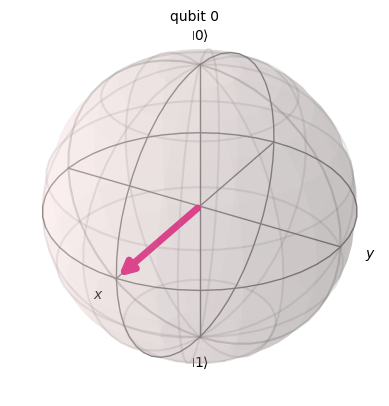

In [6]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import numpy as np


state = Statevector([1/np.sqrt(2), 1/np.sqrt(2)])
plot_bloch_multivector(state)

## Állapotok a Bloch gömbön / States on the Bloch sphere

Examine how certain states appear on the sphere.
 To do this, pick at least 4 states, the first two of which should be |0> and |1>. (Additional states are recommended, where alpha and beta are equal, and at least one completely free choice.). How does it appear on the sphere if two states are orthogonal?

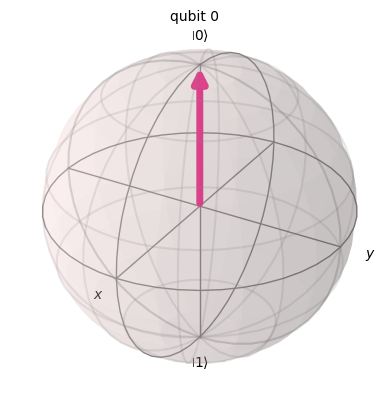

In [7]:
#quantum circuit
qc = QuantumCircuit(1,1) # 1 quantum and 1 classical bit (to store measurement results)

#quantum gates
qc.initialize([1/np.sqrt(2), 1/np.sqrt(2)], 0) #initialize the state of the quantum circuit

#different gates
qc.h(0)
qc.x(0)
qc.y(0)
qc.z(0)

#phase gate
theta = np.pi
qc.p(theta, 0)

#bloch visualization
state = Statevector(qc)
plot_bloch_multivector(state)

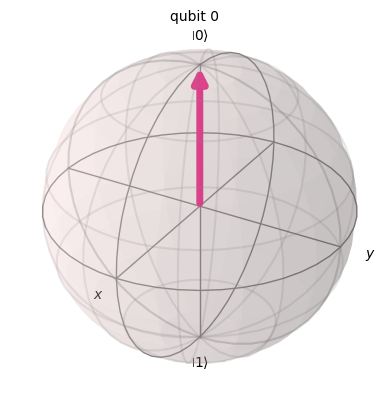

In [8]:
# State |0>

#quantum circuit
qc1 = QuantumCircuit(1,1) # 1 quantum and 1 classical
#bloch visualization
state = Statevector(qc1)
plot_bloch_multivector(state)

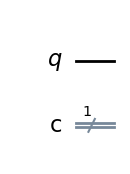

In [10]:
qc1.draw(output='mpl')

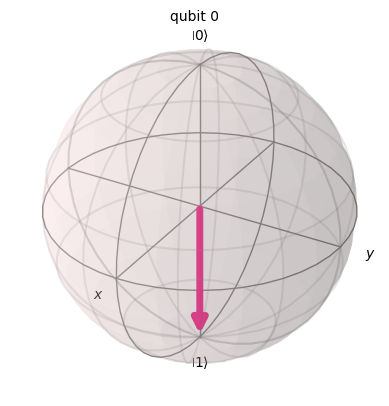

In [9]:
# State |1>

#quantum circuit
qc2= QuantumCircuit(1,1) # 1 quantum and 1 classical
#different gates
qc2.x(0)

#bloch visualization
state = Statevector(qc2)
plot_bloch_multivector(state)

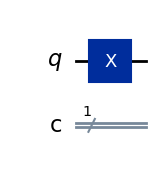

In [11]:
qc2.draw(output='mpl')

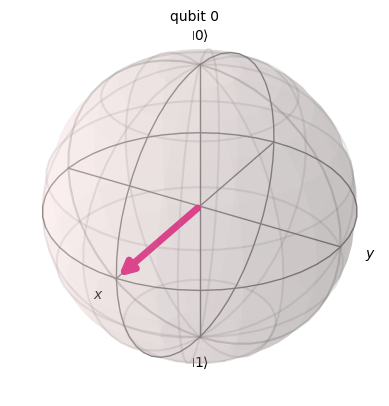

In [22]:
# First state: State where alpha and beta are equal (|+>)
# (α = β = 1/√2)

#quantum circuit
qc3 = QuantumCircuit(1,1)
#quantum gates
qc3.initialize([1/np.sqrt(2), 1/np.sqrt(2)], 0) #initialize the state of the quantum circuit

#bloch visualization
state = Statevector(qc3)
plot_bloch_multivector(state)

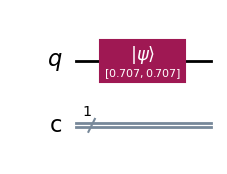

In [13]:
qc3.draw(output='mpl')

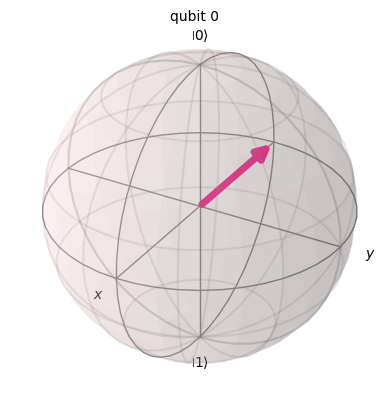

In [23]:
# Second State

#quantum circuit
qc4 = QuantumCircuit(1,1)
#hadamard gate and y gate
qc4.h(0)
qc4.y(0)

#bloch visualization
state = Statevector(qc4)
plot_bloch_multivector(state)

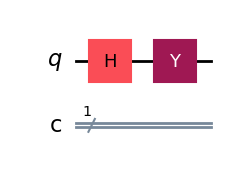

In [24]:
qc4.draw(output='mpl')

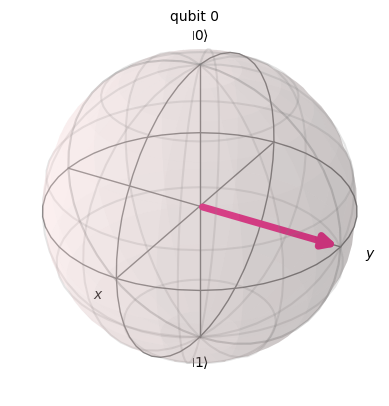

In [28]:
# Third State ⟨+∣i⟩=0
#(α = 1/√2, β = i/√2)

#quantum circuit
qc5 = QuantumCircuit(1,1)
#initialize state
qc5.initialize([1/np.sqrt(2), 1j/np.sqrt(2)], 0)

#bloch visualization
state = Statevector(qc5)
plot_bloch_multivector(state)

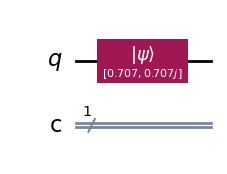

In [29]:
qc5.draw(output='mpl')

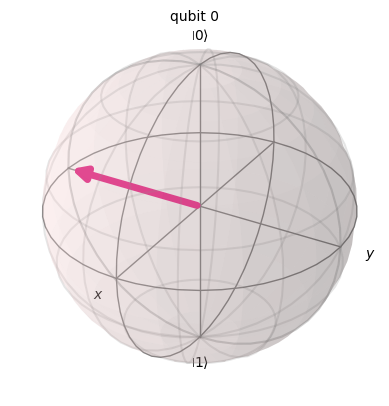

In [30]:
# Forth State ⟨+∣−i⟩=0
# (α = 1/√2, β = -i/√2)

#quantum circuit
qc6 = QuantumCircuit(1,1)
#hadamard gate and y gate
qc6.initialize([1/np.sqrt(2), -1j/np.sqrt(2)], 0)

#bloch visualization
state = Statevector(qc6)
plot_bloch_multivector(state)

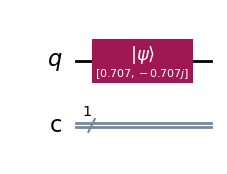

In [31]:
qc6.draw(output='mpl')


---

**How does it appear on the sphere if two states are orthogonal?**


If two states are orthogonal they will appear in perpendicular directions.

#2.  Operations on the Bloch Sphere

Examination of X,Y,Z gates: What operation do these gates perform on the sphere, and why are they named as such? Examination of H gate: What does the H gate do? Prove that HXH=Z.


* **Examination of X,Y,Z gates: What operation do these gates perform on the sphere, and why are they named as such?**

  They perform rotations to the qubit in the different axes of the Block sphere.
  * The X gate flips the the qubit state around the X-axis, like a classical NOT.
  * The Y gate rotates the state 180° around the Y-axis.
  * The Z gate applies a phase flip, the rotation is in the Z-axis.

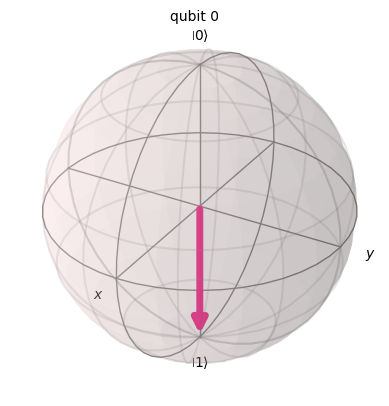

In [43]:
# Apply X gate

#quantum circuit
qcx = QuantumCircuit(1,1) # 1 quantum and 1 classical bit (to store measurement results)

qcx.x(0)

#bloch visualization
state_x = Statevector(qcx)
plot_bloch_multivector(state_x)

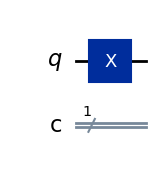

In [44]:
qcx.draw(output='mpl')

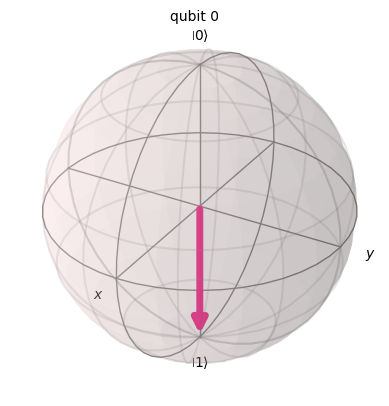

In [52]:
# Apply Y gate

#quantum circuit
qcy = QuantumCircuit(1,1)
qcy.y(0)

#bloch visualization
state_y = Statevector(qcy)
plot_bloch_multivector(state_y)

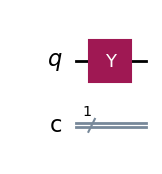

In [47]:
qcy.draw(output='mpl')

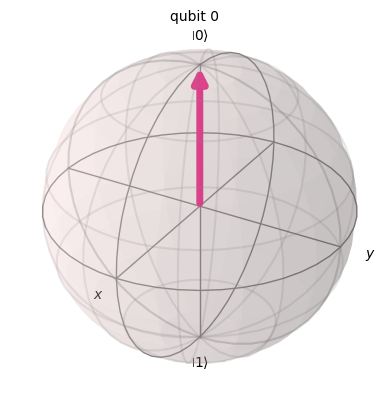

In [49]:
# Apply Z gate

#quantum circuit
qcz = QuantumCircuit(1,1) # 1 quantum and 1 classical bit (to store measurement results)
qcz.z(0)

#bloch visualization
state_z = Statevector(qcz)
plot_bloch_multivector(state_z)

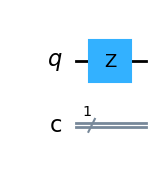

In [53]:
qcz.draw(output='mpl')


* **Examination of H gate: What does the H gate do?**

  Hadamard gate is the one that creates superposition.
  If you apply it twice, it brings the qubit back to its original state



* **Prove that HXH=Z**

  As we can see in the next images, both position of the bloch sphere are in the same location at the end of applying HXH gates or just the Z gate

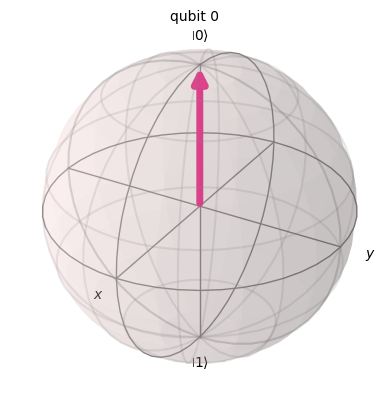

In [55]:
# Apply HXH

#quantum circuit
qcHXH = QuantumCircuit(1,1) # 1 quantum and 1 classical bit (to store measurement results)
qcHXH.h(0)
qcHXH.x(0)
qcHXH.h(0)

#bloch visualization
state_qcHXH = Statevector(qcHXH)
plot_bloch_multivector(state_qcHXH)

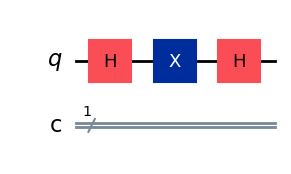

In [56]:
qcHXH.draw(output='mpl')

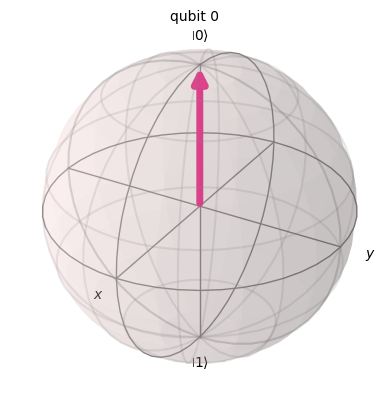

In [57]:
# Apply Z gate

#quantum circuit
qcz = QuantumCircuit(1,1) # 1 quantum and 1 classical bit (to store measurement results)
qcz.z(0)

#bloch visualization
state_z = Statevector(qcz)
plot_bloch_multivector(state_z)

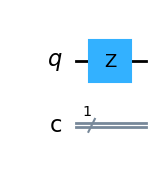

In [58]:
qcz.draw(output='mpl')

# 3. Measuring a qubit
Which region on the sphere belongs to a certain measurement result (e.g.: 50-50\% that I measure 1 or 0)? What is the state after the measurement? What is the state after the measurement after multiple measurements?

* **Which region on the sphere belongs to a certain measurement result (e.g.: 50-50% that I measure 1 or 0)?**

  * When we measure a qubit the probability of getting |0> or |1> depends on its position on the bloch sphere.
  If its on the north parth theres 100% of getting 0 after the measure.
  If its on the south parth there is a 100% of getting 1 after the measure.
  In case it's position in the middle part or equator, theres 50% of chance of both, 0 or 1.

* **What is the state after the measurement? What is the state after the measurement after multiple measurements?**

  * When a qubit is measured, it collapses into the measured state. So if we measure 0, the qubit collapses to |0>, if it's 1, the qubit collapses to |1>. Any superposition is lost because the qubit is now in the measured state.
  * If we measure the same qubit multiple times after it has collapsed, it will give us the same result, the qubit is no longer in superposition.

# 4. Measurement in different bases
Perform a measurement in the basis |+>, |->! What region on the sphere does a certain measurement result belong to? What is the state after the measurement?


* **Perform a measurement in the basis |+>, |->! What region on the sphere does a certain measurement result belong to?**

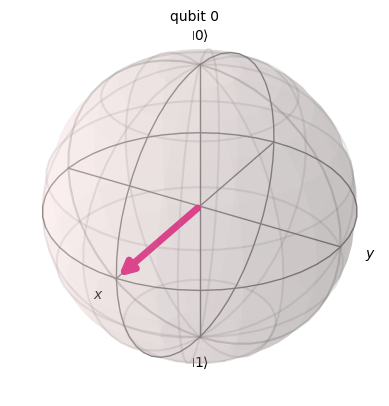

In [77]:
# |+>
#quantum circuit
qc_M1 = QuantumCircuit(1,1) # 1 quantum and 1 classical bit (to store measurement results)

qc_M1.h(0)

#bloch visualization
state_M1 = Statevector(qc_M1)
plot_bloch_multivector(state_M1)

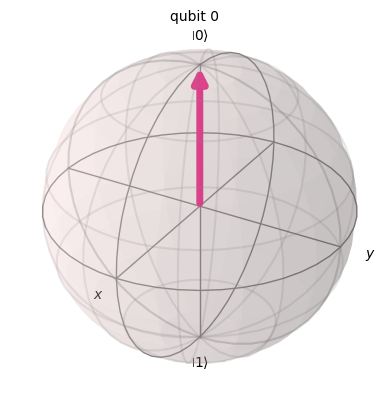

In [78]:
# |->
#quantum circuit
qc_M2 = QuantumCircuit(1,1) # 1 quantum and 1 classical bit (to store measurement results)
qc_M2.initialize([1/np.sqrt(2), 1/np.sqrt(2)], 0) #initialize the state of the quantum circuit

#quantum gates
qc_M2.h(0)
qc_M2.z(0)

#bloch visualization
state_M2 = Statevector(qc_M2)
plot_bloch_multivector(state_M2)

* **What is the state after the measurement?**

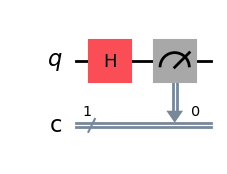

In [79]:
qc_M1.measure(range(1),range(1))
qc_M1.draw(output='mpl')

In [80]:
#select simulator
backend = Aer.get_backend('qasm_simulator')
job_sim = backend.run(transpile(qc_M1, backend), shots=1) #do 1000 measurements to collect statistics / memory = True

result_sim = job_sim.result()

counts = result_sim.get_counts()
print(counts) #print the measurement results

{'1': 1}


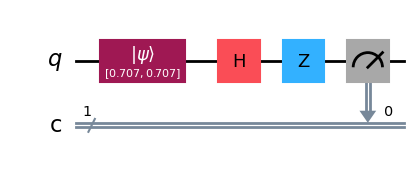

In [81]:
qc_M2.measure(range(1),range(1))
qc_M2.draw(output='mpl')

In [82]:
#select simulator
backend = Aer.get_backend('qasm_simulator')
job_sim = backend.run(transpile(qc_M2, backend), shots=1) #do 1000 measurements to collect statistics / memory = True

result_sim = job_sim.result()

counts = result_sim.get_counts()
print(counts) #print the measurement results

{'0': 1}



# 5. Preparing arbitrary qubit states
Examine the operation of the P phase-shift gate! Create a network capable of preparing any one-bit quantum state with its help!

P Phase shift change the shift of the qubit.

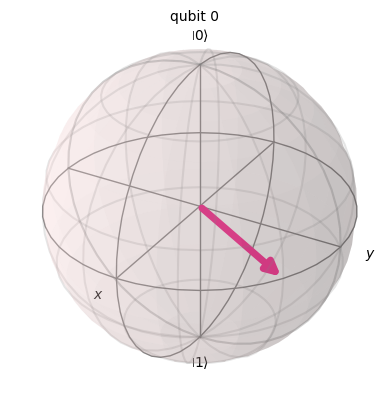

In [100]:
#quantum circuit
qc_5_ = QuantumCircuit(1,1) # 1 quantum and 1 classical bit (to store measurement results)

#quantum gates
qc_5_.h(0)  #superposition
qc_5_.p(np.pi/3, 0)   #phase shift


#bloch visualization
state_5_ = Statevector(qc_5_)
plot_bloch_multivector(state_5_)



In [101]:
qc_5_.save_statevector(label='before_meas')

In [102]:
qc_5_.measure(0, 0)

qc_5_.save_statevector(label='after_meas')

In [103]:
# Run simulation
backend = Aer.get_backend('qasm_simulator')
job_sim = backend.run(transpile(qc_5_, backend), shots=1000) #do 1000 measurements to collect statistics / memory = True

result_sim = job_sim.result()

counts = result_sim.get_counts()
print(counts)


{'1': 500, '0': 500}


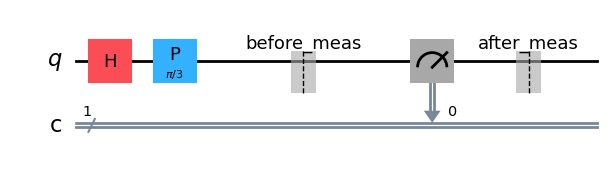

In [104]:
qc_5_.draw(output='mpl')

In [105]:
print("State Before Measurement:", result_sim.data(0)['before_meas'])
print("State After Measurement:", result_sim.data(0)['after_meas'])

State Before Measurement: Statevector([0.70710678+0.j        , 0.35355339+0.61237244j],
            dims=(2,))
State After Measurement: Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


# Cheatsheet

In [ ]:
#measurement
qc.measure(range(1),range(1)) #what qubits to measure and where to write the results
qc.draw() #we can also draw the circuit

┌─────────────────────────────┐┌───┐┌───┐┌───┐┌───┐┌──────┐┌───┐┌─┐
  q: ┤ Initialize(0.70711,0.70711) ├┤ H ├┤ X ├┤ Y ├┤ Z ├┤ P(π) ├┤ X ├┤M├
     └─────────────────────────────┘└───┘└───┘└───┘└───┘└──────┘└───┘└╥┘
c: 1/═════════════════════════════════════════════════════════════════╩═
                                                                      0

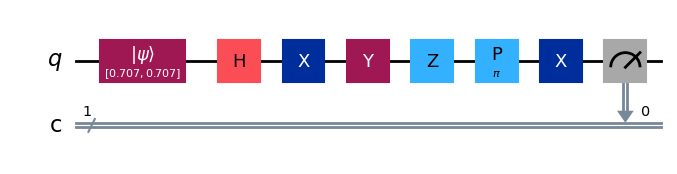

In [ ]:
qc.draw(output='mpl')

In [ ]:
from qiskit import transpile

#select simulator
backend = Aer.get_backend('qasm_simulator')
job_sim = backend.run(transpile(qc, backend), shots=1000) #do 1000 measurements to collect statistics / memory = True

result_sim = job_sim.result()

counts = result_sim.get_counts()
print(counts) #print the measurement results

# print(result_sim.data(0))['before_meas'] #For measurements
# print(result_sim.data(0))['after_meas'] #For measurements

{'0': 1000}


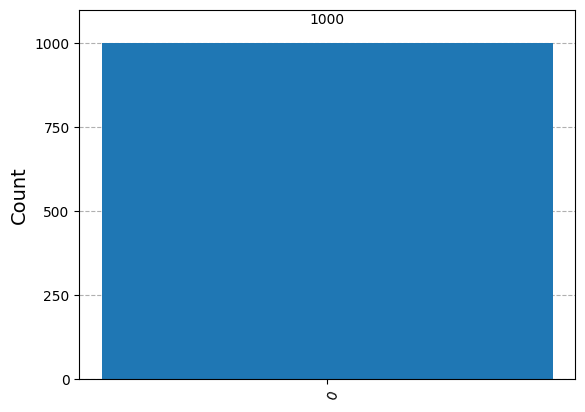

In [ ]:
from qiskit.visualization import plot_histogram

#histogram of the results
plot_histogram(counts)

In [ ]:
# for measurement
qc.save_statevector(label = 'before_meas', pershot = True)
qc.measure(range(1),range(1)) # what qubits to read and where write the results
qc.save_statevector(label = 'after_meas', pershot = True)
qc.draw()